In [30]:
import random
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# INITIALIZING HYPERPARAMETERES

In [2]:
ALPHA = 0.0001
NUM_EPOCHS = 10000
BATCH_SIZE = 15

In [3]:
INPUT_DIM = 30
OUT_DIM = 2
H_DIM = 64

# ACTIVATION FUNCTIONS AND THEIR DERIVATIVES

In [4]:
def relu(t):
    return np.maximum(t, 0)


def relu_deriv(t):
    return (t >= 0).astype(float)

def sigmoid(t):
    return 1/(1+np.exp(-t))

def sigmoid_deriv(t):
    return sigmoid(t)*(1-sigmoid(t))

def softmax(t):
    out = np.exp(t)
    return out / np.sum(out)

def softmax_batch(t):
    out = np.exp(t)
    return out / np.sum(out, axis=1, keepdims=True)


def sigmoid_batch(t):
    return 1/(1+np.exp(-t))

def tanh(x):
    return np.tanh(x);

def grad_tanh(x):
    return 1 - np.tanh(x) ** 2;


# LOSS FUNCTIONS

In [5]:
def sparse_cross_entropy(z, y):
              return -np.log(z[0, y])

def sparse_cross_entropy_batch(z, y):
              return -np.log(np.array([z[j, y[j]] for j in range(len(y))]))
    
def mse(z, y):
    return np.mean(np.power(z[0, y], 2));


In [6]:
#ONE HOT ENCODING Y 
def one_hot(y, num_classes):
    y_full = np.zeros((1, num_classes))
    y_full[0, y] = 1
    return y_full

def one_hot_batch(y, num_classes):
    y_full = np.zeros((len(y), num_classes))
    for j, yj in enumerate(y):
        y_full[j, yj] = 1
    return y_full


# INITIALIZING DATASET

In [7]:
dataset = pd.read_csv('wdbc.data',header = None)
dataset.head(5)
dataset.info()
#Feature and Label selection to set x and y
x = dataset.iloc[:, 2:].values
y = dataset.iloc[:, 1].values

labelencoder_x_1 = LabelEncoder()
y = labelencoder_x_1.fit_transform(y)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    int64  
 1   1       569 non-null    object 
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 non-null    float64
 22  22

In [8]:
dataset = [(x[i][None, ...], y[i]) for i in range(len(x))]

In [9]:
W1 = np.random.rand(INPUT_DIM, H_DIM)
b1 = np.random.rand(1, H_DIM)
W2 = np.random.rand(H_DIM, OUT_DIM)
b2 = np.random.rand(1, OUT_DIM)

In [10]:
W1 = (W1 - 0.5) * 2 * np.sqrt(1/INPUT_DIM)
b1 = (b1 - 0.5) * 2 * np.sqrt(1/INPUT_DIM)
W2 = (W2 - 0.5) * 2 * np.sqrt(1/H_DIM)
b2 = (b2 - 0.5) * 2 * np.sqrt(1/H_DIM)

In [11]:

loss_arr = []
# teaching model
for ep in range(NUM_EPOCHS):
   
    for i in range(len(dataset) // BATCH_SIZE):

        batch_x, batch_y = zip(*dataset[i*BATCH_SIZE : i*BATCH_SIZE+BATCH_SIZE])
        x = np.concatenate(batch_x, axis=0)
        y = np.array(batch_y)

        # Forward
        t1 = x @ W1 + b1
        h1 = sigmoid(t1)
        t2 = h1 @ W2 + b2
        z = sigmoid_batch(t2)
        E = np.sum(sparse_cross_entropy_batch(z, y))

        # Backward
        y_full = one_hot_batch(y, OUT_DIM)
        dE_dt2 = z - y_full
        dE_dW2 = h1.T @ dE_dt2
        dE_db2 = np.sum(dE_dt2, axis=0, keepdims=True)
        dE_dh1 = dE_dt2 @ W2.T
        dE_dt1 = dE_dh1 * sigmoid_deriv(t1)
        dE_dW1 = x.T @ dE_dt1
        dE_db1 = np.sum(dE_dt1, axis=0, keepdims=True)

        # Update parametres
        W1 = W1 - ALPHA * dE_dW1
        b1 = b1 - ALPHA * dE_db1
        W2 = W2 - ALPHA * dE_dW2
        b2 = b2 - ALPHA * dE_db2

        loss_arr.append(E)

/var/folders/8k/r1h0zb110_n__jrrs7cy28t80000gn/T/ipykernel_15306/2995731475.py:9: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-t))


In [12]:
def predict(x):
    t1 = x @ W1 + b1
    h1 = relu(t1)
    t2 = h1 @ W2 + b2
    z = softmax_batch(t2)
    return z

# Accuracy 

In [13]:
def calc_accuracy():
    correct = 0
    for x, y in dataset:
        z = predict(x)
        y_pred = np.argmax(z)
        if y_pred == y:
            correct += 1
    acc = correct / len(dataset)
    return acc

/var/folders/8k/r1h0zb110_n__jrrs7cy28t80000gn/T/ipykernel_6469/2995731475.py:19: RuntimeWarning: overflow encountered in exp
  out = np.exp(t)
/var/folders/8k/r1h0zb110_n__jrrs7cy28t80000gn/T/ipykernel_6469/2995731475.py:20: RuntimeWarning: invalid value encountered in true_divide
  return out / np.sum(out, axis=1, keepdims=True)


Accuracy: 0.9173989455184535


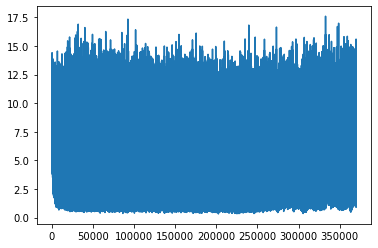

In [14]:
accuracy = calc_accuracy()
print("Accuracy:", accuracy)

import matplotlib.pyplot as plt
plt.plot(loss_arr)
plt.show()

# GA Optimization

In [14]:
def func(x):
    return -np.abs(np.sin(x) - 0.5 * x)

In [15]:

def init(m, n):
    return np.random.randint(2, size=(m,n))

In [16]:
def decode(ss, a, b):
    n = ss.shape[1]
    x = []
    for s in ss:
        bin_to_int = np.array([int(j) << i for i,j in enumerate(s[::-1])]).sum()
        int_to_x = a + bin_to_int * (b - a) / (2**n - 1)
        x.append(int_to_x)
    return np.array(x)

In [17]:
def selection(pop, sample_size, fitness):
    m,n = pop.shape
    new_pop = pop.copy()
        
    for i in range(m):
        rand_id = np.random.choice(m, size=max(1, int(sample_size*m)), replace=False)
        max_id = rand_id[fitness[rand_id].argmax()]
        new_pop[i] = pop[max_id].copy()
    
    return new_pop

In [18]:
def crossover(pop, pc):
    m,n = pop.shape
    new_pop = pop.copy()
    
    for i in range(0, m-1, 2):
        if np.random.uniform(0, 1) < pc:
            pos = np.random.randint(0, n-1)
            new_pop[i, pos+1:] = pop[i+1, pos+1:].copy()
            new_pop[i+1, pos+1:] = pop[i, pos+1:].copy()
            
    return new_pop

In [19]:
def mutation(pop, pm):
    m,n = pop.shape
    new_pop = pop.copy()
    mutation_prob = (np.random.uniform(0, 1, size=(m,n)) < pm).astype(int)
    return (mutation_prob + new_pop) % 2

In [20]:
def print_result(gen_num, pop, fitness, x):
    m = pop.shape[0]
    print('=' * 68)
    print(f'Generation {gen_num} max fitness {fitness.max():0.4f} at x = {x[fitness.argmax()]:0.4f}')
    
    for i in range(m):
        print(f'# {i+1}\t{pop[i]}   fitness: {fitness[i]:0.4f}')
    
    print(f'Average fitness: {fitness.mean():0.4f}')
    print('=' * 68, '\n')

In [21]:
def GeneticAlgorithm(func, pop_size, str_size, low, high, 
                     ps=0.2, pc=1.0, pm=0.1, max_iter=1000, eps=1e-5, random_state=None):
    
    np.random.seed(random_state)
    pop = init(pop_size, str_size)
    x = decode(pop, low, high)
    fitness = func(x)
    best = [fitness.max()]
    print_result(1, pop, fitness, x)
    
    i = 0
    while i < max_iter and abs(best[-1]) > eps:
        pop = selection(pop, ps, fitness)
        pop = crossover(pop, pc)
        pop = mutation(pop, pm)
        x = decode(pop, low, high)
        fitness = func(x)
        best.append(fitness.max())
        i += 1
    
    print_result(i, pop, fitness, x)
    
    if i == max_iter:
        print(i, 'maximum iteration reached!')
        print('Solution not found. Try increasing max_iter for better result.')
    else:
        print('Solution found at iteration', i)
        
    return fitness, x, best, i, pop_size

In [22]:
import matplotlib.pyplot as plt

In [23]:
def plot_result(func, fs, xs, best, i, m):
    xval = np.arange(1, 3, 0.01)
    yval = func(xval)
    plt.figure(figsize=(10,5))
    
    plt.subplot(121)
    plt.plot(xval, yval, color='m')
    plt.scatter(xs, fs, alpha=0.50)
    plt.xlim((1,3))
    plt.xlabel('$x$')
    plt.ylabel('$f(x) = -|sin(x) - 0.5x|$')
    plt.title('Population at Iteration ' + str(i) + '\n' + \
              'Number of Individuals: ' + str(m))
    
    plt.subplot(122)
    plt.plot(best, color='c')
    plt.xlim(0)
    plt.xlabel('Iteration')
    plt.ylabel('Best Fitness')
    plt.title('Best Fitness vs Iteration' + '\n' + \
              'Number of Individuals: ' + str(m))
    
    plt.tight_layout()
    plt.show()

Generation 1 max fitness -0.0174 at x = 1.9165
# 1	[0 1 1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 1]   fitness: -0.0174
# 2	[1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0]   fitness: -0.8531
# 3	[1 1 0 1 0 0 0 1 0 1 1 1 0 1 0 1 0 1 0 1]   fitness: -0.8342
# 4	[1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 1 1]   fitness: -0.4428
# 5	[1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1]   fitness: -1.0461
# 6	[1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0]   fitness: -1.1612
# 7	[0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0]   fitness: -0.1666
# 8	[0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1]   fitness: -0.2122
# 9	[0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1]   fitness: -0.1402
# 10	[0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0]   fitness: -0.3417
# 11	[0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0]   fitness: -0.1384
# 12	[0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0]   fitness: -0.2935
# 13	[0 1 0 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 0 0]   fitness: -0.1177
# 14	[1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0]   fitness: -0.9482
# 15	[0 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 

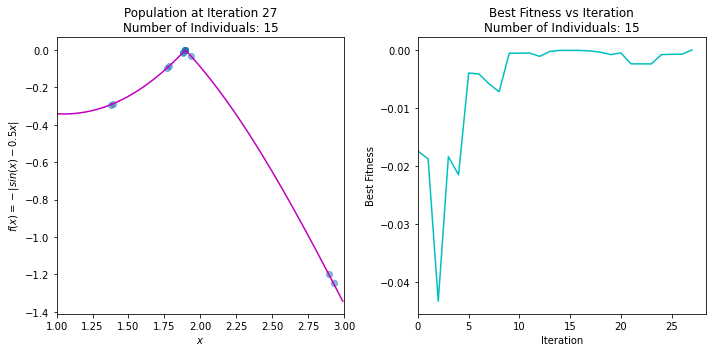

In [24]:
fs, xs, best, i, m = GeneticAlgorithm(func, pop_size=15, str_size=20, low=1, high=3, random_state=69)
plot_result(func, fs, xs, best, i, m)

In [25]:
def mat_to_vector(mat_pop_weights):
     pop_weights_vector = []
     for sol_idx in range(mat_pop_weights.shape[0]):
         curr_vector = []
         for layer_idx in range(mat_pop_weights.shape[1]):
             vector_weights = numpy.reshape(mat_pop_weights[sol_idx, layer_idx], newshape=(mat_pop_weights[sol_idx, layer_idx].size))
             curr_vector.extend(vector_weights)
         pop_weights_vector.append(curr_vector)
     return numpy.array(pop_weights_vector)

In [26]:
def vector_to_mat(vector_pop_weights, mat_pop_weights):
    mat_weights = []
    for sol_idx in range(mat_pop_weights.shape[0]):
        start = 0
        end = 0
        for layer_idx in range(mat_pop_weights.shape[1]):
            end = end + mat_pop_weights[sol_idx, layer_idx].size
            curr_vector = vector_pop_weights[sol_idx, start:end]
            mat_layer_weights = numpy.reshape(curr_vector, newshape=(mat_pop_weights[sol_idx, layer_idx].shape))
            mat_weights.append(mat_layer_weights)
            start = end
    return numpy.reshape(mat_weights, newshape=mat_pop_weights.shape)

In [27]:
sol_per_pop = 8
num_parents_mating = 4
num_generations = 1000
mutation_percent = 10


In [34]:
dataset.shape()

AttributeError: 'list' object has no attribute 'shape'

In [32]:
initial_pop_weights = []
for curr_sol in np.arange(0, sol_per_pop):
    HL1_neurons = 150
    input_HL1_weights = np.random.uniform(low=-0.1, high=0.1, size=(dataset.shape[1], HL1_neurons))

AttributeError: 'list' object has no attribute 'shape'